# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Aaron Gillespie

For this final, I am to demonstrate capabilities & proficiencies in web scraping and natrual language processing using Python. I will be scraping data from the web, saving it locally, running a sentiment analysis and generating a summary of an article from the web. The assignment is open-ended, and thus **I've chosen to continue with what's become my signature move/tradition & pointing my newfound coding capabilities toward one of my giant long-running projects to see what I can learn about myself**. In particular, I'll be analyzing (at least) one of my entries from [my personal blog](https://aarongilly.com/Columns).


# Imports

In [71]:
from collections import Counter
import pickle
import requests
import spacy
from spacy.tokens import Doc

from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

!python -m spacy download en_core_web_sm

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.10.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [72]:
# Function to fetch and parse the webpage
def fetch_webpage(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup
    else:
        print(f"Failed to retrieve webpage: {response.status_code}")
        return None

article_url = "https://aarongilly.com/Columns/83"

article_soup = fetch_webpage(article_url)
print("Article fetched successfully.")
print(article_soup.get_text()[:300])


Article fetched successfully.

#83 - One Week TrackedThe ColumnAaron GillespieHusband. Father. Writer. Puzzle maker. Engineer. Purveyor of bad jokes.SubscribeLawrence, KSMy NotesMovie PodcastPuzzle BoxesGitHubExplorerPagesCreationsWrapper LibraryWorkbenchesWe Scene a Movie (og)We Scene a MovieThe VaultShieldSemantic Canvas 1.2Se


In [73]:
# Save the article HTML to a file
with open("Column_83.html", "w", encoding="utf-8") as f:
    f.write(str(article_soup))
print("Article HTML saved to Column_83.html.")

Article HTML saved to Column_83.html.


## Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [74]:
# Load model
nlp = spacy.load("en_core_web_sm")

# Build pipeline
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob", last=True)

# Print pipeline components
print("Pipeline components:", nlp.pipe_names)

# Manually register the extensions 
if not Doc.has_extension("polarity"):
    Doc.set_extension("polarity", getter=lambda doc: doc._.blob.polarity)
if not Doc.has_extension("subjectivity"):
    Doc.set_extension("subjectivity", getter=lambda doc: doc._.blob.subjectivity)

# Load article from file
with open("Column_83.html", "r", encoding="utf-8") as f:
    article_html = f.read()

# Extract the contents of the article
article_soup = BeautifulSoup(article_html, 'html.parser')
# Extract only the text within the <article> tag
article_tag = article_soup.find("article")
if article_tag:
    article_text = article_tag.get_text()
else:
    article_text = ""

# Run pipeline
doc = nlp(article_text)

# Access registered attributes and round results
polarity = round(doc._.polarity, 2)
subjectivity = round(doc._.subjectivity, 2)

# Print results
print("\nPolarity:", polarity)
print("Subjectivity:", subjectivity)

Pipeline components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'spacytextblob']

Polarity: 0.05
Subjectivity: 0.45


In [75]:
print("Number of sentences in the article:", len(list(nlp(article_text).sents)))

Number of sentences in the article: 62


## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [76]:
# Get all tokens (lowercase, exclude punctuation and spaces)
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Count token frequencies
token_freq = Counter(tokens)

# Get the five most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("Five most frequent tokens (lowercase):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Five most frequent tokens (lowercase):
Token: 'i', Frequency: 45
Token: 'the', Frequency: 35
Token: 'to', Frequency: 31
Token: 'a', Frequency: 26
Token: 'of', Frequency: 25


...what boring tokens. I forgot to filter out things.

Five most frequent tokens (excluding stop words):
Token: 'life', Frequency: 10
Token: 'data', Frequency: 9
Token: 'things', Frequency: 8
Token: 'week', Frequency: 6
Token: 'day', Frequency: 5


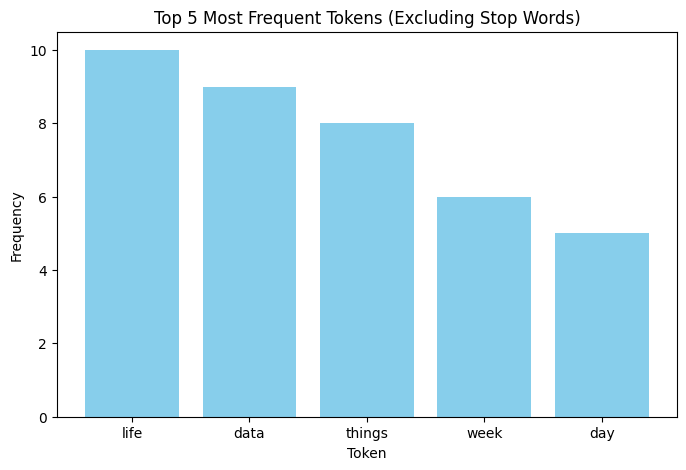

In [77]:
# Get all tokens (lowercase, exclude punctuation, spaces, and stop words)
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not token.is_punct and not token.is_space and not token.is_stop
]

# Count token frequencies
filtered_token_freq = Counter(filtered_tokens)

# Get the five most common tokens
filtered_most_common_tokens = filtered_token_freq.most_common(5)

# Print results
print("Five most frequent tokens (excluding stop words):")
for token, freq in filtered_most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

# Plot a bar chart of the five most frequent tokens (excluding stop words)
labels, counts = zip(*filtered_most_common_tokens)
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue')
plt.title("Top 5 Most Frequent Tokens (Excluding Stop Words)")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.show()

...much better. Also appropriate. Sounds about right. I write about life, data, and things... and this was an analysis of time. So yup. Tracks.

## Question 4 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [78]:
# Get all lemmas (lowercase, exclude punctuation, spaces, and stop words)
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_punct and not token.is_space and not token.is_stop
]

# Count lemma frequencies
filtered_lemma_freq = Counter(filtered_lemmas)

# Get the five most common lemmas
filtered_most_common_lemmas = filtered_lemma_freq.most_common(5)

# Print results
print("Five most frequent lemmas (excluding stop words):")
for lemma, freq in filtered_most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Five most frequent lemmas (excluding stop words):
Lemma: 'life', Frequency: 10
Lemma: 'day', Frequency: 8
Lemma: 'thing', Frequency: 8
Lemma: 'week', Frequency: 8
Lemma: 'summary', Frequency: 7


## Question 5 

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Re-using my code from a previous module here.

In [ ]:
# Define a function to be more explicit about which tokens we care about
def is_character_we_care_about(token):
    return not token.is_stop and not token.is_punct and not token.is_space

# Count the frequency of tokens, excluding stop words and punctuation
token_freq = Counter(token.text.lower() for token in doc if is_character_we_care_about(token))

# Get the 5 most common tokens
common_tokens = token_freq.most_common(5)

# Get the 5 most common lemmas
lemma_freq = Counter(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space)
common_lemmas = lemma_freq.most_common(5)   

# Print the common tokens with their frequencies
print("Most common tokens:")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}") 

# Define functions to score sentences based on tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """Score a sentence based on the presence of interesting tokens."""
    words = [token.text.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    return sum(1 for word in words if word in interesting_tokens) / len(words)

# Define functions to score sentences based on lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """Score a sentence based on the presence of interesting lemmas."""
    words = [token.lemma_.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    return sum(1 for word in words if word in interesting_lemmas) / len(words)
interesting_tokens = [token for token, _ in common_tokens]
interesting_lemmas = [lemma for lemma, _ in common_lemmas]

# Calculate the interesting tokens and lemmas
article_sentences = [sent.text for sent in doc.sents]
print(f"Number of sentences in the article: {len(article_sentences)}\n")

# Initialize lists to store scores
sentence_token_scores = []
sentence_lemma_scores = []

# Score each sentence and store the results
for sentence in article_sentences:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)
    sentence_token_scores.append(token_score)
    sentence_lemma_scores.append(lemma_score)

    print(f"Sentence: {sentence}")
    print(f"Token Score: {token_score:.2f}, Lemma Score: {lemma_score:.2f}\n")

# Plot histogram for token scores
plt.figure(figsize=(8, 5))
plt.hist(sentence_token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentence Token Scores")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range of scores appears to be between 0.0 and 0.1 for both token and lemma scores, as indicated by the peaks in the histograms.
# This suggests that many sentences have low scores, possibly due to the presence of common words or phrases that do not contribute significantly to the overall sentiment or meaning of the article.
# Which means I use too many words to say too little.


Most common tokens:
Token: life, Frequency: 10
Token: data, Frequency: 9
Token: things, Frequency: 8
Token: week, Frequency: 6
Token: day, Frequency: 5


## Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Most common lemmas:
Lemma: life, Frequency: 10
Lemma: day, Frequency: 8
Lemma: thing, Frequency: 8
Lemma: week, Frequency: 8
Lemma: summary, Frequency: 7


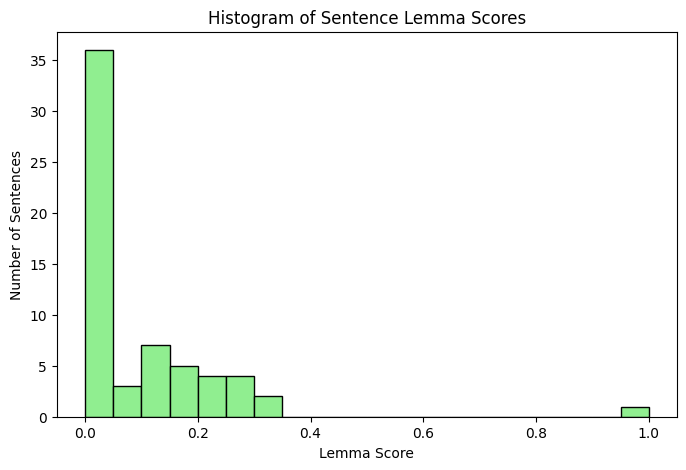

In [ ]:

# Code from before already covered lemmas, just building the histogram here


# Print the common tokens with their frequencies
print("Most common lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}") 

# Plot histogram for lemma scores
plt.figure(figsize=(8, 5))
plt.hist(sentence_lemma_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Sentence Lemma Scores")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range of scores appears to be between 0.0 and 0.1 for both token and lemma scores, as indicated by the peaks in the histograms.
# This suggests that many sentences have low scores, possibly due to the presence of common words or phrases that do not contribute significantly to the overall sentiment or meaning of the article.
# Which means I use too many words to say too little.



## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .2
* Cutoff Score (lemmas): .2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [84]:
# Create a summary using token scores and the cutoff from question 8
token_cutoff = 0.2
sentence_list = [sent.text.strip() for sent, score in zip(doc.sents, sentence_token_scores) if score > token_cutoff]

print(f"Number of sentences in the summary: {len(sentence_list)}\n")

# Print the summary
summary_text = '\n'.join(sentence_list)
print("Token-based Summary:\n")
print(summary_text)

Number of sentences in the summary: 7

Token-based Summary:

Life only seems to get more hectic as you get older.
Demetri - My list of 25 things a “good” person would do every day.
It’s mostly white space, but the data is there.
This is my life last week:
Desktop screenshot showing a portion of my week’s dietary intake (summaries are after each day, not before)
Through my initial results I have already learned a few things.
I’ll use the Top 5 to outline those things below.


## Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [85]:
# Analyze the summary text using spaCy pipeline
summary_doc = nlp(summary_text)

# Get polarity score
summary_polarity = round(summary_doc._.polarity, 2)

# Get number of sentences in the summary
num_summary_sentences = len(list(summary_doc.sents))

print(f"Polarity score of token-based summary: {summary_polarity}")
print(f"Number of sentences in the summarized article: {num_summary_sentences}")

Polarity score of token-based summary: 0.19
Number of sentences in the summarized article: 6


Interestingly summarizing the article changed its polarity score from 0.05 to 0.19, meaning it got slightly more positive when you take out boring bits. It's also not super comprehensible now, so there's that.

## Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [86]:
# Create a summary using lemma scores and the cutoff from question 8
lemma_cutoff = 0.2
sentence_list = [sent.text.strip() for sent, score in zip(doc.sents, sentence_lemma_scores) if score > lemma_cutoff]

print(f"Number of sentences in the summary: {len(sentence_list)}\n")

# Print the summary
summary_text = '\n'.join(sentence_list)
print("Lemma-based Summary:\n")
print(summary_text)

Number of sentences in the summary: 7

Lemma-based Summary:

Life only seems to get more hectic as you get older.
Demetri - My list of 25 things a “good” person would do every day.
This is my life last week:
Desktop screenshot showing a portion of my week’s dietary intake (summaries are after each day, not before)
Rather than include a screenshot of it I’ll just say that it summarizes every day with the number of Demetri goals completed, the dietary summary from each day, and  the number of days I worked out.
Through my initial results I have already learned a few things.
I’ll use the Top 5 to outline those things below.


## Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [87]:
# Analyze the summary text using spaCy pipeline
summary_doc = nlp(summary_text)

# Get polarity score
summary_polarity = round(summary_doc._.polarity, 2)

# Get number of sentences in the summary
num_summary_sentences = len(list(summary_doc.sents))

print(f"Polarity score of lemma-based summary: {summary_polarity}")
print(f"Number of sentences in the summarized article: {num_summary_sentences}")

Polarity score of lemma-based summary: 0.21
Number of sentences in the summarized article: 6


I'm wondering if the discrepancy from 7 sentences shown above to the 6 output by the summarized article counter is due to one "ineteresting" sentence ending with a colon, rather than a period. This would explain why it dropped down upon re-analysis of the summary. 

## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

First, the scores:

| Item                | Polarity |
| ------------------- | -------- |
| Original Article    | 0.05     |
| Token-Based Summary | 0.19     |
| Lemma-Based Summary | 0.21     |

There is a difference - the shorter, summarized articles have a *higher* polarity. This means they are **less neutral**. If you take out sentences that aren't packed with interesting words and phrases you lose context. Context is necessary! Once you remove context, things become much more black and white.

Interestingly, this lines up exactly with what we see in the age of Twitter. You limit Tweet length and force **context collapse** upon the readers, and they get increasing polarized. The meanings of the word "polarized" in this context is slightly different than it is in the original context, but it works in both its connotations here. The increased polarity score from removing content (the uninteresting sentences) makes that content likely to be literally more polarizing for people to read. It's like saying "Pizza is the best food." rather than saying "Pizza is the best food.  do, however, I understand and appreciate alternative points of view may exist on this topic.

## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

In my case the summaries are *slightly* different. 6 of the 7 sentences provided in each summary are identical, however each contains one the other does not:

The Token-Based summary includes the sentence: *It’s mostly white space, but the data is there.*
The Lemma-Based summary includes the sentence: *Rather than include a screenshot of it I’ll just say that it summarizes every day with the number of Demetri goals completed, the dietary summary from each day, and  the number of days I worked out.*

Subjectively, I'd say that both summaries are **not great**. Maybe I'm biased as the author, but the summaries of the articles created using this method are a bit all over the place. They make reference to images that aren't there. They are disjointed and weird. 

Having said that, the *lemma-based* summary does include a bit more of the "gist" of the article. I think in this case that's perhaps dumb luck, though. As I stated, neither did well.

As for **why** these aren't great, I think this approach to summarizing text is *interesting*, but somewhat crude. Simply cherry picking sentences with a high number of interesting words isn't really doing any of the hard work of understanding what's being said, and thinking of more concise ways to say it. 

Perhaps we are spoiled in the age of LLMs - check this summary of the entire article from ChatGPT:

> The blog post introduces the author's Life Tracking System (LTS), inspired by the idea that defining a problem is more important than rushing to solve it. Faced with the increasing complexity of adult life, the author designed the LTS to audit four key areas: Diet, Exercise, Money, and a personal values checklist called "Demetri." The system uses a custom Google Form and automated spreadsheet scripts to make daily tracking efficient and insightful. Over the past week, the author successfully used the LTS and gathered meaningful data in all four areas. The result was a noticeable increase in awareness, productivity, and personal accountability. Key takeaways include surprising eating habits, the impact of soda, and how tracking drives better behavior. The post ends with a lighthearted quote and a promise of a less intense future update.

Now *that's* a summary!